### Используется, написанный на 4ом семинаре агент для Q обучения.

In [1]:
import random, math

import numpy as np
from collections import defaultdict


class QLearningAgent():
    """
    Q-Learning агент

    Замечание: избегайте прямое использование 
    self._q_values, для этого определены 
    функции: get_q_value, set_q_value
    """

    def __init__(self, alpha, epsilon, discount, 
                 get_legal_actions):
        self.get_legal_actions = get_legal_actions
        self._q_values = \
            defaultdict(lambda: defaultdict(lambda: 0))  
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_q_value(self, state, action):
        return self._q_values[state][action]

    def set_q_value(self, state, action, value):
        self._q_values[state][action] = value

Добавим нашему агенту возможность вычислять оценки $V$:

In [2]:
def get_value(self, state):
    """
      Возвращает значение функции полезности, 
      рассчитанной по Q[state, action], 
    """
    possible_actions = self.get_legal_actions(state)

    # value = 
    #~~~~~~~~ Ваш код здесь ~~~~~~~~~~~    
    #raise NotImplementedError  
    value = max([self.get_q_value(state, action) for action in possible_actions])
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    return value

QLearningAgent.get_value = get_value

Стратегия нашего агента будет заключаться в выборе лучшего действия, в соответствии с оценками $Q$:

In [3]:
def get_policy(self, state):
    """
      Выбирает лучшее действие, согласно стратегии.
    """
    possible_actions = self.get_legal_actions(state)
    
    # выбираем лучшее действие, согласно стратегии
    #best_action = 
    #~~~~~~~~ Ваш код здесь ~~~~~~~~~~~    
    #raise NotImplementedError    
    best_one = np.max(np.array([self.get_q_value(state, action) for action in possible_actions]))
    best_action = [action for action in possible_actions if self.get_q_value(state, action) == best_one]
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    return best_action

QLearningAgent.get_policy = get_policy

Для конкретной ситуации мы будем выбирать действие, используя $\epsilon$-жадный подход:

In [4]:
def get_action(self, state):
    """
      Выбирает действие, предпринимаемое в данном 
      состоянии, включая исследование (eps greedy)
      С вероятностью self.epsilon берем случайное 
      действие, иначе действие согласно стратегии 
      (self.get_policy)
    """
    possible_actions = self.get_legal_actions(state)

    # выбираем действие, используя eps-greedy подход
    # action = 
    #~~~~~~~~ Ваш код здесь ~~~~~~~~~~~    
    #raise NotImplementedError   
    a = self.get_policy(state)
    n = len(possible_actions)
    n_max = len(a)
    if n == n_max:
        create_probablities = [1/n_max for i in possible_actions]
    else:
        create_probablities = [(1 - self.epsilon)/n_max if i in a else self.epsilon/(n-n_max) \
                                                                   for i in possible_actions ]
    
    action = np.random.choice(a = possible_actions, p = create_probablities)
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    return action

QLearningAgent.get_action = get_action

In [5]:
def update(self, state, action, next_state, reward):
    """
      функция Q-обновления 
    """
    # выполняем Q-обновление, 
    # используем методы getQValue и setQValue
    #~~~~~~~~ Ваш код здесь ~~~~~~~~~~~    
    #raise NotImplementedError  
    Q_max = self.get_value(next_state)
    Q_current = self.get_q_value(state, action)
    
    value = Q_current + self.alpha*(reward + self.discount*Q_max - Q_current)
    self.set_q_value(state, action, value)
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
QLearningAgent.update = update

Тестируем нашего агента на задаче Taxi

In [10]:
import gym
from MyGymEnv import myenv3
env = myenv3.Snake(4,4) 

n_actions = env.action_space.n

In [11]:
def play_and_train(env, agent, t_max=10**3):
    """функция запускает полную игру,
    используя стратегию агента (agent.get_action(s))
    выполняет обновление агента (agent.update(...))
    и возвращает общее вознаграждение
    """
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        # выбираем действие
        # a = 
        #~~~~~~~~ Ваш код здесь ~~~~~~~~~~~        
        #raise NotImplementedError     
        a = agent.get_action(s)
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        next_s, r, done = env.step(a)
        
        # выполняем обновление стратегии
        # agent.update()
        #~~~~~~~~ Ваш код здесь ~~~~~~~~~~~        
        #raise NotImplementedError  
        agent.update(s, a, next_s, r)
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        s = next_s
        total_reward +=r
        if done:
            break
        
    return total_reward

eps = 0.05 mean reward = 2.5
alpha= 0.1


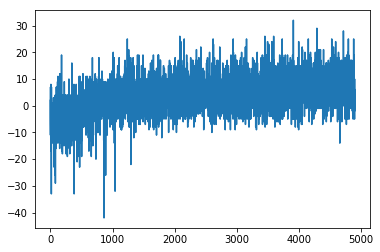

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

agent = QLearningAgent(alpha=0.1, epsilon=0.05,
                       discount=0.95,
                       get_legal_actions=lambda s: range(
                           n_actions))

assert 'get_policy' in dir(agent)
rewards = []
for i in range(5000):
    rewards.append(play_and_train(env, agent))

    if i % 100 == 0:
        clear_output(True)
        print('eps =', agent.epsilon,
              'mean reward =', np.mean(rewards[-10:]))
        print("alpha=", agent.alpha)
        plt.plot(rewards)
        plt.show()

### Проверяем работу агента

In [13]:
from IPython.display import display, clear_output
import time
s = env.reset()
for i in range(100):
    a = agent.get_action(s)
    s, r, done = env.step(a)
    env.render()
    time.sleep(0.5)
    if done:
        print(i)
        break
    clear_output()

****
F**S
***S
***S
7
